# TimeTree Playground

[C 1]
{A 1}


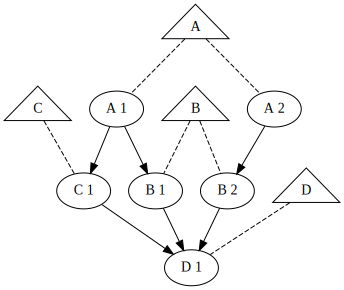

In [1]:
from TimeTree import TimeTree, draw_simple_time_tree, draw_total_time_tree

d = TimeTree("D", versions = {1: []})
b = TimeTree("B", versions = {1 : [d[1]], 2: [d[1]]})
c = TimeTree("C", versions = {1 : [d[1]]})
a = TimeTree("A", versions = {1 : [b[1], c[1]], 2: [b[2]]})

print(d[1].find_commonalities(b[1]))

dot = draw_total_time_tree([a, b, c, d])

dot

## Contradiction

A contradiction occurs when one version depends on two different versions of the same dependency.

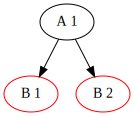

In [2]:
# Example 1

b = TimeTree("B", versions= {1 : [], 2 : []})
a = TimeTree("A", versions = {1 : [b[1], b[2]]})

draw_simple_time_tree(a[1])

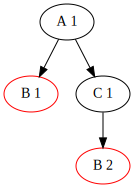

In [3]:
# Example 2

b = TimeTree("B", versions= {1 : [], 2 : []})
c = TimeTree("C", versions = {1: [b[2]]})
a = TimeTree("A", versions = {1 : [b[1], c[1]]})

draw_simple_time_tree(a[1])

### Rules of Contradiction

Given A and B are TimeTreeVersions, and B is a child of A, then:
 - If B has a contradiction, A has a contradiction.
 - If A has a contradiction, B may have a contradiction.

# Commonalities

{A 1, B 1}
{A 1, B 1}


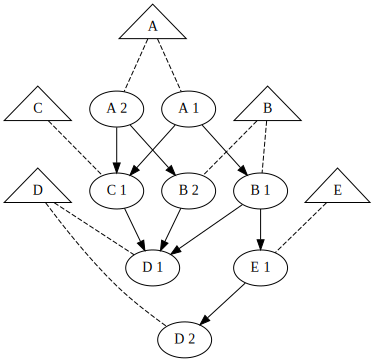

In [4]:
d = TimeTree("D", versions = {1: [], 2: []})
e = TimeTree("E", versions = {1: [d[2]]})
b = TimeTree("B", versions = {1 : [d[1], e[1]], 2: [d[1]]})
c = TimeTree("C", versions = {1 : [d[1]]})
a = TimeTree("A", versions = {1 : [b[1], c[1]], 2: [b[2], c[1]]})

print(d[1].find_commonalities(d[2]))
print(a[1].find_commonalities_under(d[1], d[2]))

draw_total_time_tree([a, b, c, d, e])

# Lowest Common Commonality

The purpose of the LCC is to determine which node is "responsible" for a commonality occuring. A commonality is an LCC if one of the following is true:

There are no other commonalities beneath it. In the below, only C1 is the lowest commonality between D1 and D2, even though B1 also has a contradiction.

[C 1]


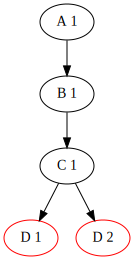

In [5]:
d = TimeTree("D", versions = {1: [], 2: []})
c = TimeTree("C", versions = {1: [d[1], d[2]]})
b = TimeTree("B", versions= {1 : [c[1]]})
a = TimeTree("A", versions = {1 : [b[1]]})

print(a[1].find_lowest_commonalities(d[1], d[2]))

draw_simple_time_tree(a[1])

... or, if one of the children of the common node has a descendant that is one of the two. In the below, even though one of it's children (C1) is a commonality, B1 is also a LCC because one of it's children that isn't a commonality has D2 as a descendent.

[B 1, C 1]


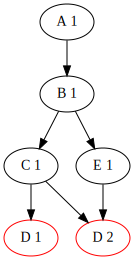

In [7]:
d = TimeTree("D", versions = {1: [], 2: []})
e = TimeTree("E", versions = {1: [d[2]]})
c = TimeTree("C", versions = {1: [d[1], d[2]]})
b = TimeTree("B", versions= {1 : [c[1], e[1]]})
a = TimeTree("A", versions = {1 : [b[1]]})

print(a[1].find_lowest_commonalities(d[1], d[2]))

draw_simple_time_tree(a[1])